<a href="https://colab.research.google.com/github/3morii74/Machine-learning-project/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy scikit-learn tensorflow imblearn gradio matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 110.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.6 MB/s eta 0:00:00


In [11]:
import pandas as pd

data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(data.head())
print(data.info())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [12]:
print(data.isnull().sum())

print(data['Churn'].value_counts())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [13]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

<ipython-input-13-3157e3826bf4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Churn'] = le.fit_transform(data['Churn'])

categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                   'PaperlessBilling', 'PaymentMethod']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [15]:
data.drop('customerID', axis=1, inplace=True)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [17]:
from imblearn.over_sampling import SMOTE

X = data.drop('Churn', axis=1)
y = data['Churn']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("After SMOTE:", y_resampled.value_counts())

After SMOTE: Churn
0    5174
1    5174
Name: count, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (7243, 30) (7243,)
Validation set: (1552, 30) (1552,)
Test set: (1553, 30) (1553,)


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input

tf.config.run_functions_eagerly(True)

input_dim = X_train.shape[1]  # Number of features

# Model 1: Simple FNN
model1 = Sequential([
    Input(shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Model 2: Deep Neural Network
model2 = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Model 3: Regularized Neural Network
model3 = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile and train models with different optimizers
optimizers = {
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.001),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=0.001),
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
}

models = {'FNN': model1, 'DNN': model2, 'Regularized': model3}
histories = {}

for model_name, model in models.items():
    for opt_name, optimizer in optimizers.items():
        print(f"Training {model_name} with {opt_name}")
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                           epochs=50, batch_size=32, verbose=1)
        histories[f"{model_name}_{opt_name}"] = history.history

Training FNN with Adam
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7098 - loss: 0.5539

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


227/227 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - accuracy: 0.7099 - loss: 0.5537 - val_accuracy: 0.7758 - val_loss: 0.4687
Epoch 2/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - accuracy: 0.7729 - loss: 0.4750 - val_accuracy: 0.7784 - val_loss: 0.4548
Epoch 3/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.7795 - loss: 0.4636 - val_accuracy: 0.7809 - val_loss: 0.4511
Epoch 4/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - accuracy: 0.7844 - loss: 0.4549 - val_accuracy: 0.7912 - val_loss: 0.4461
Epoch 5/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - accuracy: 0.7883 - loss: 0.4504 - val_accuracy: 0.7925 - val_loss: 0.4388
Epoch 6/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.8061 - loss: 0.4249 - val_accuracy: 0.7938 - val_loss: 0.4381
Epoch 7/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - accuracy: 0.7961 - loss: 0.4321 - val_accuracy: 0.7938 - val_loss: 0.4339
Epoch 8/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.7984 - loss: 0.4290 - val_accurac

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


226/227 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8691 - loss: 0.3002

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


227/227 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.8691 - loss: 0.3003 - val_accuracy: 0.8041 - val_loss: 0.4384
Epoch 2/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.8675 - loss: 0.2968 - val_accuracy: 0.8151 - val_loss: 0.4261
Epoch 3/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.8723 - loss: 0.2979 - val_accuracy: 0.8099 - val_loss: 0.4421
Epoch 4/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.8786 - loss: 0.2838 - val_accuracy: 0.8138 - val_loss: 0.4250
Epoch 5/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.8823 - loss: 0.2818 - val_accuracy: 0.8067 - val_loss: 0.4330
Epoch 6/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.8717 - loss: 0.2935 - val_accuracy: 0.7983 - val_loss: 0.4642
Epoch 7/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.8875 - loss: 0.2724 - val_accuracy: 0.7990 - val_loss: 0.4561
Epoch 8/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.8751 - loss: 0.2909 - val_accuracy

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8374 - loss: 0.3912

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


227/227 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.8373 - loss: 0.3913 - val_accuracy: 0.8015 - val_loss: 0.4639
Epoch 2/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.8407 - loss: 0.3628 - val_accuracy: 0.7964 - val_loss: 0.4767
Epoch 3/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.8425 - loss: 0.3516 - val_accuracy: 0.8067 - val_loss: 0.4645
Epoch 4/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.8513 - loss: 0.3298 - val_accuracy: 0.7777 - val_loss: 0.4794
Epoch 5/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.8440 - loss: 0.3375 - val_accuracy: 0.8067 - val_loss: 0.4465
Epoch 6/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.8607 - loss: 0.3154 - val_accuracy: 0.8138 - val_loss: 0.4400
Epoch 7/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.8621 - loss: 0.3116 - val_accuracy: 0.8028 - val_loss: 0.4517
Epoch 8/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.8686 - loss: 0.3020 - val_accuracy: 0.8

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


ValueError: Unknown variable: <Variable path=sequential_7/dense_27/kernel, shape=(30, 128), dtype=float32, value=[[ 0.10584413 -0.00879791 -0.15426512 ...  0.00915846  0.04499683
   0.08076392]
 [ 0.04455559  0.18756925  0.00939828 ... -0.1484204  -0.10459569
  -0.15665299]
 [-0.08846936 -0.02064897 -0.09238508 ...  0.05854858 -0.02300662
  -0.09751403]
 ...
 [-0.10037723  0.09951051 -0.10546311 ...  0.03385402 -0.18542224
   0.19382165]
 [ 0.02771144 -0.1468621   0.16941474 ...  0.02872168  0.04224838
  -0.13645984]
 [ 0.07411654 -0.07080574  0.02678943 ... -0.0499575  -0.07690316
  -0.11630117]]>. This optimizer can only be called for the variables it was originally built with. When working with a new set of variables, you should recreate a new optimizer instance.

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {}
for model_name, model in models.items():
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

# Display results
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

 1/49 ━━━━━━━━━━━━━━━━━━━━ 7s 154ms/step

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
 1/49 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
 4/49 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
             Accuracy  Precision    Recall  F1 Score
FNN          0.814552   0.810143  0.814379  0.812256
DNN          0.584031   0.573006  0.610458  0.591139
Regularized  0.510625   0.501666  0.984314  0.664607


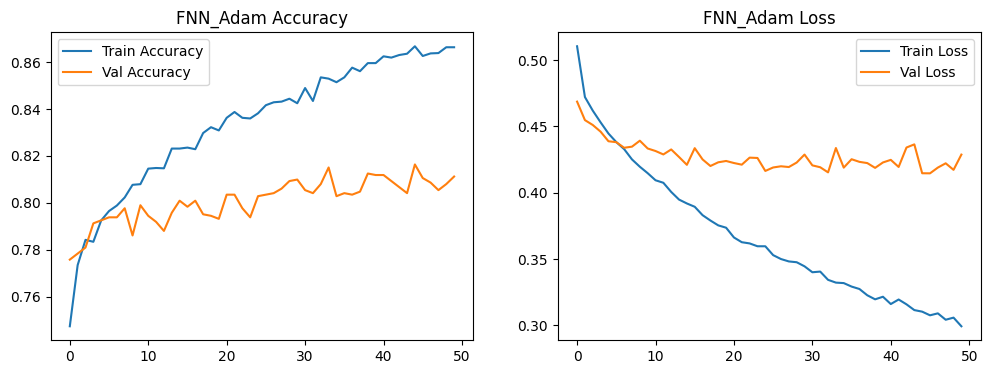

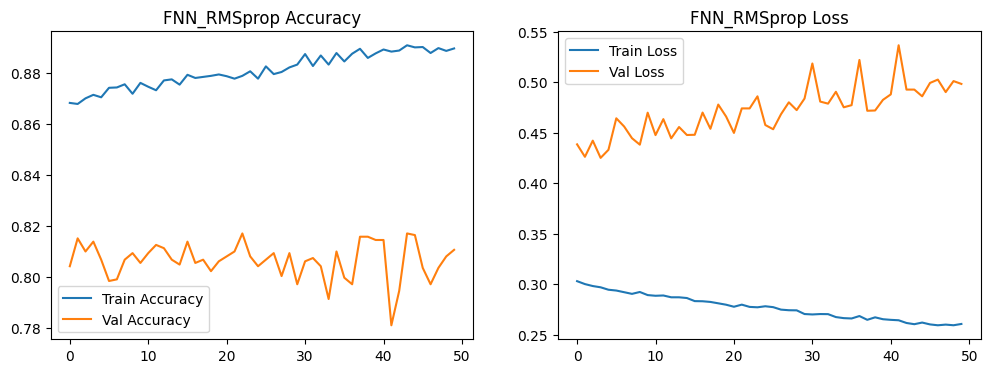

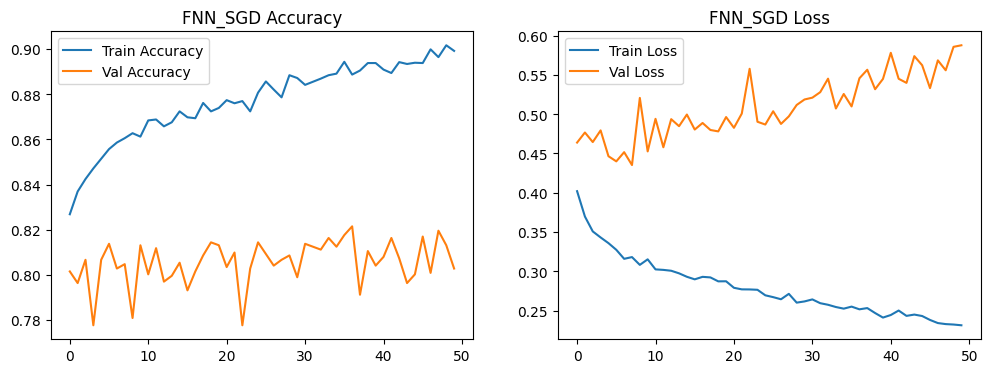

In [23]:
import matplotlib.pyplot as plt

for model_name, history in histories.items():
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Train Accuracy')
    plt.plot(history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()
    plt.show()